In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import math

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge


In [2]:

df_de =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet3',index_col=0, engine='openpyxl')
df_oog =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet4',index_col=0, engine='openpyxl')
df_sf6 =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet5',index_col=0, engine='openpyxl')
df_ldc =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet6',index_col=0, engine='openpyxl')


In [3]:
dfs = [df_de,df_sf6,df_oog,df_ldc]
for df in dfs:
    print(df.columns)
    print(df.shape)

Index(['FRS_Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2020_perc_change', '2020_change_pattern',
       '2012_perc_change', '2012_change_pattern', '2013_perc_change',
       '2013_change_pattern', '2014_perc_change', '2014_change_pattern',
       '2015_perc_change', '2015_change_pattern', '2016_perc_change',
       '2016_change_pattern', '2017_perc_change', '2017_change_pattern',
       '2018_perc_change', '2018_change_pattern', '2019_perc_change',
       '2019_change_pattern'],
      dtype='object')
(6515, 40)
Index(['FRD_id', 'Facility_Name', 'City', 'State', 'Zip_Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2012_perc_change', '2012_cha

# Subsetting the datasets with the numeric columns and the State

In [4]:
columns = ['State','Latitude', 'Longitude','2020','2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011']
df_de_X = df_de[columns]
df_sf6_X = df_sf6[columns]
df_oog_X = df_oog[columns]
df_ldc_X = df_ldc[columns]
df_de_X.reset_index(drop=True,inplace=True)
df_sf6_X.reset_index(drop=True,inplace=True)
df_oog_X.reset_index(drop=True,inplace=True)
df_ldc_X.reset_index(drop=True,inplace=True)

# One-hot encoded for States

In [5]:
df_de_st_dummies=pd.get_dummies(df_de_X['State'])
df_de_X_d= df_de_X.drop(['State','2020'],axis=1).join(df_de_st_dummies)
columns = df_de_X_d.columns
df_de_y=df_de_X[['2020']]
df_sf6_st_dummies=pd.get_dummies(df_sf6_X['State'])
df_sf6_X_d = df_sf6_X.drop(['State','2020'],axis=1).join(df_sf6_st_dummies)
df_sf6_y=df_sf6_X[['2020']]
df_oog_st_dummies=pd.get_dummies(df_oog_X['State'])
df_oog_X_d = df_oog_X.drop(['State','2020'],axis=1).join(df_oog_st_dummies)
df_oog_y=df_oog_X[['2020']]
df_ldc_st_dummies=pd.get_dummies(df_ldc_X['State'])
df_ldc_X_d= df_ldc_X.drop(['State','2020'],axis=1).join(df_ldc_st_dummies)
df_ldc_y=df_ldc_X[['2020']]


# Standardizing the numeric columns

In [6]:
scaler = preprocessing.StandardScaler().fit(df_de_X_d)
df_de_X_s=pd.DataFrame(scaler.transform(df_de_X_d))
df_de_X_s.columns = df_de_X_d.columns
scaler = preprocessing.StandardScaler().fit(df_sf6_X_d)
df_sf6_X_s=pd.DataFrame(scaler.transform(df_sf6_X_d))
df_sf6_X_s.columns = df_sf6_X_d.columns
scaler = preprocessing.StandardScaler().fit(df_oog_X_d)
df_oog_X_s=pd.DataFrame(scaler.transform(df_oog_X_d))
df_oog_X_s.columns = df_oog_X_d.columns
scaler = preprocessing.StandardScaler().fit(df_ldc_X_d)
df_ldc_X_s=pd.DataFrame(scaler.transform(df_ldc_X_d))
df_ldc_X_s.columns = df_ldc_X_d.columns

# Model 1: MultiOutput Regressor - Random Forest

In [7]:
#Creating the model for DE dataset

#Dropping the 3 years data to enable prediction for 3 years
X = df_de_X.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df_de_X.State))
y= df_de_X[['2018','2019','2020']]

#Splitting data into training and test sets
df_de_X_train, df_de_X_test, df_de_y_train, df_de_y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)

#Defining the MultiOutputRegressor
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, max_depth=5, random_state=2))
regr_multirf.fit(df_de_X_train, df_de_y_train)

#Predicting for 3 years
y_multirf = regr_multirf.predict(df_de_X_test)


In [9]:
print('Mean squared error', mean_squared_error(df_de_y_test, y_multirf))
print('SQRT of R-squared', math.sqrt(mean_squared_error(df_de_y_test, y_multirf)))
print('Mean absolute error', mean_absolute_error(df_de_y_test, y_multirf))


rmse=np.sqrt(np.sum((y_multirf - df_de_y_test)**2)/len(df_de_y_test))
mae = np.sum(np.abs(y_multirf - df_de_y_test))/len(df_de_y_test)
den =np.sum((df_de_y_test-np.mean(df_de_y_test))**2)/len(df_de_y_test)
print('R-squared error for DE dataset:\n',1-(rmse/den))

Mean squared error 134179107608.71758
SQRT of R-squared 366304.6650108589
Mean absolute error 115680.81348233084
R-squared error for DE dataset:
 2018    1.0
2019    1.0
2020    1.0
dtype: float64


## MultiOutput Regressor model for all 4 datasets - Random Forest

In [10]:
Xs = [df_de_X,df_sf6_X,df_oog_X,df_ldc_X]
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, max_depth=5, random_state=2))
y_multirf=[]
for df in Xs:
    X = df.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df.State))
    y= df[['2018','2019','2020']]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)
    regr_multirf.fit(X_train, y_train)
    y_multirf=regr_multirf.predict(X_test)
    
    rmse=np.sqrt(np.sum((y_multirf - y_test)**2)/len(y_test))
    mae = np.sum(np.abs(y_multirf - y_test))/len(y_test)
    den =np.sum((y_test-np.mean(y_test))**2)/len(y_test)
    print('R-squared error for dataset:\n',1-(rmse/den))

R-squared error for dataset:
 2018    1.0
2019    1.0
2020    1.0
dtype: float64
R-squared error for dataset:
 2018    0.999990
2019    0.999991
2020    0.999988
dtype: float64
R-squared error for dataset:
 2018    0.999998
2019    0.999998
2020    0.999996
dtype: float64
R-squared error for dataset:
 2018    0.999992
2019    0.999989
2020    0.999989
dtype: float64


## MultiOutput Regressor model for all 4 datasets - Ridge

In [11]:
Xs = [df_de_X,df_sf6_X,df_oog_X,df_ldc_X]
regr_multiridge = MultiOutputRegressor(Ridge(normalize=True))
y_multirf=[]
for df in Xs:
    X = df.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df.State))
    y= df[['2018','2019','2020']]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)
    regr_multiridge.fit(X_train, y_train)
    y_multiridge=regr_multiridge.predict(X_test)
    
    rmse=np.sqrt(np.sum((y_multiridge - y_test)**2)/len(y_test))
    mae = np.sum(np.abs(y_multiridge - y_test))/len(y_test)
    den =np.sum((y_test-np.mean(y_test))**2)/len(y_test)
    print('R-squared error for dataset:\n',1-(rmse/den))


R-squared error for dataset:
 2018    1.0
2019    1.0
2020    1.0
dtype: float64
R-squared error for dataset:
 2018    0.999994
2019    0.999993
2020    0.999990
dtype: float64
R-squared error for dataset:
 2018    0.999998
2019    0.999998
2020    0.999997
dtype: float64
R-squared error for dataset:
 2018    0.999989
2019    0.999987
2020    0.999984
dtype: float64


# Adding a constant and Train Test split of the datasets for a Linear Regression Model

In [12]:
df_de_X_s1 = sm.add_constant(df_de_X_s)
df_sf6_X_s1 = sm.add_constant(df_sf6_X_s)
df_oog_X_s1 = sm.add_constant(df_oog_X_s)
df_ldc_X_s1 = sm.add_constant(df_ldc_X_s)

df_de_X_train, df_de_X_test, df_de_y_train, df_de_y_test=train_test_split(df_de_X_s1, df_de_y, test_size = 0.25, random_state = 246)
df_sf6_X_train, df_sf6_X_test, df_sf6_y_train, df_sf6_y_test=train_test_split(df_sf6_X_s1, df_sf6_y, test_size = 0.25, random_state = 246)
df_oog_X_train, df_oog_X_test, df_oog_y_train, df_oog_y_test=train_test_split(df_oog_X_s1, df_oog_y, test_size = 0.25, random_state = 246)
df_ldc_X_train, df_ldc_X_test, df_ldc_y_train, df_ldc_y_test=train_test_split(df_ldc_X_s1, df_ldc_y, test_size = 0.25, random_state = 246)


## OLS Model and their evaluation on 4 datasets

In [13]:
rModel_de = sm.OLS(df_de_y_train, df_de_X_train)
rModel_de_results = rModel_de.fit()
print(rModel_de_results.summary())
rModel_pred = rModel_de_results.predict(df_de_X_test)

                            OLS Regression Results                            
Dep. Variable:                   2020   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1645.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:23:58   Log-Likelihood:                -67023.
No. Observations:                4886   AIC:                         1.342e+05
Df Residuals:                    4821   BIC:                         1.346e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.728e+05   3165.356    117.768      0.0

### The R-squared value of .956 determines that model is working with this Direct Emission data. 

In [14]:
rModel_sf6 = sm.OLS(df_sf6_y_train, df_sf6_X_train)
rModel_sf6_results = rModel_sf6.fit()
rModel_sf6_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     2.751
Date:                Mon, 14 Mar 2022   Prob (F-statistic):            0.00457
Time:                        17:23:58   Log-Likelihood:                -724.60
No. Observations:                  66   AIC:                             1531.
Df Residuals:                      25   BIC:                             1621.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.77e+04   4342.707      6.379      0.000    1.88e+04    3.66e+04
Latitude    6053.6565   2.02e+04      0.300      0.767   -3.55e+04    4.76e+04
Longitude   3.447e+04   4.08e+04      0.845      0.406   -4.95e+04    1.18e+05
2019         2.44e+04   1.28e+04      1.913      0.067   -1869.999    5.07e+04
2018       -9947.6394   9601.278     -1.036      0.310   -2.97e+04    9826.563
2017        2.473e+04   1.46e+04      1.698      0.102   -5274.817    5.47e+04
2016        4.182e+04   2.82e+04      1.485      0.150   -1.62e+04    9.98e+04
2015        4810.5649   1.92e+04      0.251      0.804   -3.47e+04    4.44e+04
2014       -1.129e+04   1.42e+04     -0.794      0.434   -4.06e+04     1.8e+04
2013          73.3121   1.83e+04      0.004      0.997   -3.76e+04    3.78e+04
2012       -2.587e+04   1.92e+04     -1.347      0.190   -6.54e+04    1.37e+04
2011        1.603e+04   2.59e+04      0.618      0.542   -3.74e+04    6.95e+04
AL         -4215.5720   3378.185     -1.248      0.224   -1.12e+04    2741.931
AZ          7955.2734   1.07e+04      0.746      0.462    -1.4e+04    2.99e+04
CA          1.789e+04   1.94e+04      0.920      0.366   -2.21e+04    5.79e+04
CO         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
FL         -4197.1367   6667.425     -0.629      0.535   -1.79e+04    9534.683
GA          -565.9265   4057.199     -0.139      0.890   -8921.885    7790.032
HI          1.579e+04   1.93e+04      0.817      0.421    -2.4e+04    5.56e+04
IA         -2927.9608   3942.747     -0.743      0.465    -1.1e+04    5192.279
IL          3938.4277   5288.806      0.745      0.463   -6954.072    1.48e+04
IN         -6910.4054   5531.425     -1.249      0.223   -1.83e+04    4481.779
KS         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
KY         -2167.5135   4885.951     -0.444      0.661   -1.22e+04    7895.290
LA          -2.08e+04   1.52e+04     -1.369      0.183   -5.21e+04    1.05e+04
MA         -6730.8310   7783.173     -0.865      0.395   -2.28e+04    9298.913
MI         -3903.4226   9006.778     -0.433      0.668   -2.25e+04    1.46e+04
MN          4632.3150   7102.710      0.652      0.520   -9995.991    1.93e+04
MO         -1970.1981   2873.577     -0.686      0.499   -7888.441    3948.045
NC         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
ND         -3232.1197   5465.825     -0.591      0.560   -1.45e+04    8024.957
NE         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
NJ         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
NM          4317.7765   4215.080      1.024      0.315   -4363.344     1.3e+04
NV          7837.3412   8140.703      0.963      0.345   -8928.749    2.46e+04
NY         -7246.5068   1.54e+04     -0.472      0.641   -3.89e+04    2.44e+04
OH

### R-squared value is .851 for the SF6 dataset, which shows the possibility for improvement in the model.

In [15]:
rModel_ldc = sm.OLS(df_ldc_y_train, df_ldc_X_train)
rModel_ldc_results = rModel_ldc.fit()
rModel_ldc_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     944.9
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.14e-83
Time:                        17:23:58   Log-Likelihood:                -1247.1
No. Observations:                 123   AIC:                             2600.
Df Residuals:                      70   BIC:                             2749.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.751e+04    809.544     95.750      0.000    7.59e+04    7.91e+04
Latitude   -2851.2681   3789.634     -0.752      0.454   -1.04e+04    4706.919
Longitude    578.4717   7429.644      0.078      0.938   -1.42e+04    1.54e+04
2019        1.608e+05   1.81e+04      8.870      0.000    1.25e+05    1.97e+05
2018       -1.125e+04   2.46e+04     -0.456      0.649   -6.04e+04    3.79e+04
2017        1.077e+04    2.1e+04      0.512      0.610   -3.12e+04    5.27e+04
2016        2.392e+04   3.03e+04      0.789      0.433   -3.66e+04    8.44e+04
2015       -6.189e+04   2.98e+04     -2.080      0.041   -1.21e+05   -2534.734
2014        2210.6435   1.07e+04      0.206      0.837   -1.91e+04    2.36e+04
2013        1.003e+04   1.14e+04      0.880      0.382   -1.27e+04    3.27e+04
2012         1.12e+04   7115.324      1.574      0.120   -2989.932    2.54e+04
2011       -1897.5636   7129.442     -0.266      0.791   -1.61e+04    1.23e+04
AL          -555.1757   1036.182     -0.536      0.594   -2621.775    1511.424
AR          4795.5884    949.750      5.049      0.000    2901.371    6689.806
AZ            18.8965   1673.110      0.011      0.991   -3318.017    3355.810
CA           846.5516   2592.997      0.326      0.745   -4325.017    6018.120
CO          1704.2597   1357.731      1.255      0.214   -1003.650    4412.170
CT          -119.8047   2079.151     -0.058      0.954   -4266.541    4026.931
DE           175.3793   1273.092      0.138      0.891   -2363.722    2714.480
FL         -1208.5140   1518.556     -0.796      0.429   -4237.179    1820.151
GA           913.9540    721.051      1.268      0.209    -524.136    2352.044
IA           691.5308    915.744      0.755      0.453   -1134.863    2517.924
ID            90.8532   1332.683      0.068      0.946   -2567.100    2748.806
IL           172.9434    980.904      0.176      0.861   -1783.408    2129.295
IN           -84.2766    892.411     -0.094      0.925   -1864.134    1695.581
KS          -147.6672    984.680     -0.150      0.881   -2111.549    1816.215
KY           278.4362    789.142      0.353      0.725   -1295.457    1852.329
LA          -497.4949    984.926     -0.505      0.615   -2461.868    1466.878
MA           593.6672   2295.624      0.259      0.797   -3984.811    5172.146
MD             4.4132   1241.849      0.004      0.997   -2472.376    2481.202
MI           695.8636   1248.250      0.557      0.579   -1793.692    3185.419
MN          1717.2715   1317.241      1.304      0.197    -909.883    4344.426
MO           -60.5915    826.240     -0.073      0.942   -1708.476    1587.293
MS         -6071.3556     63.408    -95.750      0.000   -6197.820   -5944.891
MT           968.1465   2054.071      0.471      0.639   -3128.569    5064.862
NC            90.2269   1102.139      0.082      0.935   -2107.919    2288.373
NE

### R-squared value is .999 for the LDC dataset, the model is doing the maximum best...

In [16]:
rModel_oog = sm.OLS(df_oog_y_train, df_oog_X_train)
rModel_oog_results = rModel_oog.fit()
print(rModel_oog_results.summary())
rModel_oog_pred = rModel_oog_results.predict(df_oog_X_test)

                            OLS Regression Results                            
Dep. Variable:                   2020   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     36.84
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.89e-82
Time:                        17:23:58   Log-Likelihood:                -4718.8
No. Observations:                 351   AIC:                             9494.
Df Residuals:                     323   BIC:                             9602.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.048e+05   9394.894     21.800      0.0

### R-squared value is .775 for the OOG dataset, the model has a lot of scope for improvement...

## Random Forest Regressor Model

RMSE for DE dataset:  359418.4770559491
MAE for DE dataset:  91493.89489457145
R-squared error for DE dataset:  0.9999997091002553


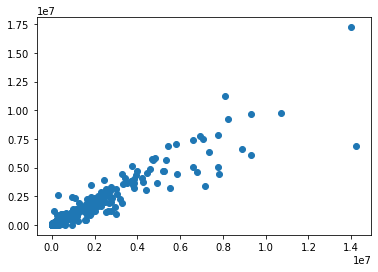

In [17]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)
de_train = np.ravel(df_de_y_train)
rModel_de_res = reg.fit(df_de_X_train, de_train)
de_pred = rModel_de_res.predict(df_de_X_test)
de_test = np.ravel(df_de_y_test)
plt.scatter(de_pred,de_test)


rmse=np.sqrt(np.sum((de_pred - de_test)**2)/len(de_pred))
print('RMSE for DE dataset: ',rmse)
mae = np.sum(np.abs(de_pred - de_test))/len(de_pred)
print('MAE for DE dataset: ',mae)
den =np.sum((de_test-np.mean(de_test))**2)/len(de_test)
print('R-squared error for DE dataset: ',1-(rmse/den))

RMSE for OOG dataset:  146851.36932120068
MAE for OOG dataset:  80409.96893646893
R-squared error for OOG dataset:  0.9999975092910391


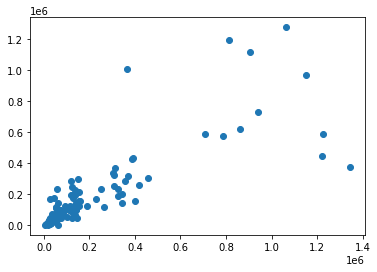

In [18]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)
y_train = np.ravel(df_oog_y_train)
model_oog_res = reg.fit(df_oog_X_train, y_train)
oog_pred = model_oog_res.predict(df_oog_X_test)
oog_test = np.ravel(df_oog_y_test)
plt.scatter(oog_pred, oog_test)

rmse=np.sqrt(np.sum((rModel_oog_pred - oog_test)**2)/len(rModel_oog_pred))
print('RMSE for OOG dataset: ',rmse)
mae = np.sum(np.abs(rModel_oog_pred - oog_test))/len(rModel_oog_pred)
print('MAE for OOG dataset: ',mae)
den =np.sum((oog_test-np.mean(oog_test))**2)/len(oog_test)
print('R-squared error for OOG dataset: ',1-(rmse/den))

RMSE for LDC dataset:  5025.030076321013
MAE for LDC dataset:  3086.2842569105683
R-squared error for LDC dataset 0.9999969348431952


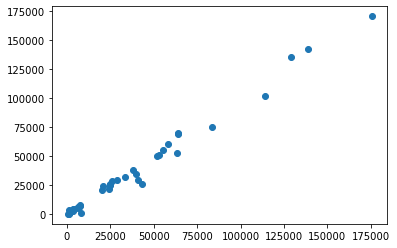

In [19]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)
ldc_train = np.ravel(df_ldc_y_train)
rModel_ldc_res = reg.fit(df_ldc_X_train, ldc_train)
ldc_pred = rModel_ldc_res.predict(df_ldc_X_test)
ldc_test = np.ravel(df_ldc_y_test)
plt.scatter(ldc_pred,ldc_test)


rmse=np.sqrt(np.sum((ldc_pred - ldc_test)**2)/len(ldc_pred))
print('RMSE for LDC dataset: ',rmse)
mae = np.sum(np.abs(ldc_pred - ldc_test))/len(ldc_pred)
print('MAE for LDC dataset: ',mae)
den =np.sum((ldc_test-np.mean(ldc_test))**2)/len(ldc_test)
print('R-squared error for LDC dataset', 1-(rmse/den))

RMSE for SF6 dataset:  37304.66170046136
MAE for SF6 dataset:  21185.232321070238
R-squared error for SF6 dataset: 0.9999878036751283


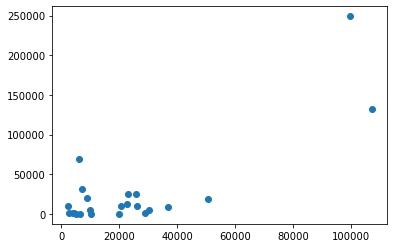

In [20]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)
sf6_train = np.ravel(df_sf6_y_train)
rModel_sf6_res = reg.fit(df_sf6_X_train, sf6_train)
sf6_pred = rModel_sf6_res.predict(df_sf6_X_test)
sf6_test = np.ravel(df_sf6_y_test)
plt.scatter(sf6_pred,sf6_test)


rmse=np.sqrt(np.sum((sf6_pred - sf6_test)**2)/len(sf6_pred))
print('RMSE for SF6 dataset: ',rmse)
mae = np.sum(np.abs(sf6_pred - sf6_test))/len(sf6_pred)
print('MAE for SF6 dataset: ',mae)
den =np.sum((sf6_test-np.mean(sf6_test))**2)/len(sf6_test)
print('R-squared error for SF6 dataset:', 1-(rmse/den))

### Random Forest Model is doing very well on all the four datasets.

## Building a Random Forest Model to predict the future 10 years emission

RMSE for DE dataset:  116499.0729368651
MAE for DE dataset:  28730.47531361095
R-squared error for DE dataset:  0.9999998971832522


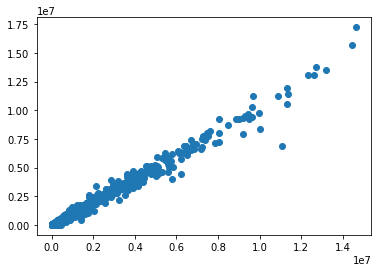

In [21]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)

de_train = np.ravel(df_de_y)
rModel_de_res = reg.fit(df_de_X_s, de_train)
de_pred = rModel_de_res.predict(df_de_X_s)
de_test = np.ravel(df_de_y)
plt.scatter(de_pred,de_test)

rmse=np.sqrt(np.sum((de_pred - de_test)**2)/len(de_pred))
print('RMSE for DE dataset: ',rmse)
mae = np.sum(np.abs(de_pred - de_test))/len(de_pred)
print('MAE for DE dataset: ',mae)
den =np.sum((de_test-np.mean(de_test))**2)/len(de_test)
print('R-squared error for DE dataset: ',1-(rmse/den))

In [22]:
years =  ['2020','2019', '2018', '2017', '2016','2015', '2014', '2013', '2012','2011']
years_future = ['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029']
y_future = {}
i=9
print(X.shape, y.shape)
dropped_columns = pd.DataFrame()
X1=df_de_X_s.copy()
for year in years_future:
    y_pred = rModel_de_res.predict(X1)
    #append the results to the dataframe
    X1 = X1.drop([years[-1]],axis = 1)
    X1[year] = y_pred
    years.pop(i)
    i=i-1
X1['2030'] =rModel_de_res.predict(X1)

(164, 52) (164, 3)


In [23]:
X1.head()

,Latitude,Longitude,AK,AL,AR,AZ,CA,CO,CT,DC,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,-0.671908,-0.242047,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,397519.728533,436117.589600,439892.066133,416371.448267,438368.814133,412113.502667,436870.510600,500750.693733,294328.890533,294328.890533
1,0.559976,1.102614,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,55771.236267,53624.354538,53728.296933,48547.499738,44669.635876,47583.883200,54118.689733,77050.832267,303727.368657,303727.368657
2,-0.798682,-0.658915,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,41421.104800,39468.723200,39468.723200,39468.723200,37926.519467,38417.360667,45561.318133,45275.415733,294124.642533,294124.642533
3,0.756044,0.272284,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,44980.744400,42805.762400,39079.832533,41091.666133,35820.244400,37049.710400,38674.512000,15249.807333,301868.933190,301868.933190
4,-0.944130,-0.388869,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,31135.200000,28231.549467,32170.732000,33343.600667,33117.882800,31684.666133,37317.278967,44062.024700,295899.694400,295899.694400


## Following the same steps for all the four data sets

In [24]:
Xs=[df_de_X_s,df_sf6_X_s,df_oog_X_s,df_ldc_X_s]
ys=[df_de_y,df_sf6_y,df_oog_y,df_ldc_y]
output=[]
for df in range(4):
    y = np.ravel(ys[df])
    X=Xs[df]
    rModel_res = reg.fit(X, y)
    y_pred = rModel_res.predict(X)
    years =  ['2020','2019', '2018', '2017', '2016','2015', '2014', '2013', '2012','2011']
    years_future = ['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029']
    i=9
    X1=X.copy()
    for year in years_future:
        y_pred = rModel_res.predict(X1)
        #append the results to the dataframe
        X1 = X1.drop([years[-1]],axis = 1)
        X1[year] = y_pred
        years.pop(i)
        i=i-1
    X1['2030'] =rModel_res.predict(X1)
    output.append(X1)

In [25]:
de_future = output[0]
sf6_future = output[1]
oog_future = output[2]
ldc_future = output[3]


## Multi output regressor on all 4 datasets

In [26]:
Xs = [df_de_X,df_sf6_X,df_oog_X,df_ldc_X]

regr_multiridge = MultiOutputRegressor(Ridge(normalize=True))
y_multiridge=[]
for df in Xs:
    X = df.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df.State))
    y= df[['2018','2019','2020']]
    regr_multiridge.fit(X, y)
    y_multiridge=regr_multiridge.predict(X)
    
    rmse=np.sqrt(np.sum((y_multiridge - y)**2)/len(y))
    mae = np.sum(np.abs(y_multiridge - y))/len(y)
    den =np.sum((y-np.mean(y))**2)/len(y)
    print('R-squared error for ',df,' dataset:\n',1-(rmse/den))

R-squared error for       State   Latitude   Longitude        2020        2019           2018  \
0       TX  33.298570  -96.535860  504064.000  518680.250  653854.000000   
1       NY  40.663000  -74.000000   60819.700   44658.384   70705.288000   
2       NM  32.540693 -103.522351   40521.812   38691.478  435280.099943   
3       IL  41.835129  -87.915924  100500.948   18925.400   31220.150000   
4       TX  31.671177  -98.996513   29359.640   30571.636   34432.420000   
...    ...        ...         ...         ...         ...            ...   
6510    TX  31.795396  -94.179048   22359.122   44919.946   30924.146000   
6511    IL  42.477600  -87.895000  325679.418  395152.486  321472.988000   
6512    CO  39.736900 -105.016900       0.000   10870.860   16707.788000   
6513    TX  27.888611  -97.277778  650907.100  857709.816  783385.604000   
6514    NC  35.661943  -82.996087   89476.750   82134.750   74998.250000   

               2017           2016           2015           2014  

In [27]:
Xs = [df_de_X,df_sf6_X,df_oog_X,df_ldc_X]

regr_multioutput = MultiOutputRegressor(Ridge(normalize=True,alpha=.001))
regr_multioutput1 = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, max_depth=5, random_state=2))

y_multioutput=[]
y_multioutput1=[]
multioutput=[]
multioutput1=[]

for df in Xs:
    X_temp = df.drop('State',axis=1).join(pd.get_dummies(df.State))
    X = X_temp.drop(['2019','2020'],axis=1)
    y= df[['2019','2020']]
    regr_multioutput.fit(X, y)
    regr_multioutput1.fit(X,y)
    years =  ['2020','2019', '2018', '2017', '2016','2015', '2014', '2013', '2012','2011']
    years_future = ['2019','2020','2021','2022','2023','2024','2025','2026','2027','2028']
    i=9
    j=0
 
    X1=X.copy()
    X2 = X.copy()
    for j in range(5):
        y_multioutput = regr_multioutput.predict(X1)
        y_multioutput1 = regr_multioutput1.predict(X2)

        #append the results to the dataframe
        if i>0:
            for num in range(2):
                X1 = X1.drop([years[-1]],axis = 1)
                X2 = X2.drop([years[-1]],axis = 1)

                years.pop(i)
                i=i-1
                col = years_future[0]
                
                X1[col] = y_multioutput[:,num]
                X2[col] = y_multioutput1[:,num]
                
                years_future.pop(0)
                
    y_multioutput = regr_multioutput.predict(X1)
    y_multioutput1 = regr_multioutput1.predict(X2)

    X1['2029'] = y_multioutput[:,0]
    X1['2030'] = y_multioutput[:,1]
    X2['2029'] = y_multioutput1[:,0]
    X2['2030'] = y_multioutput1[:,1]
       
    multioutput.append(X1)
    multioutput1.append(X2)

# Comparison of output of different models

## SF6 2021-2030 emission prediction using Multioutput Ridge Regressor

In [28]:
multioutput[1]

,Latitude,Longitude,AL,AZ,CA,CO,FL,GA,HI,IA,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,39.588493,-81.682523,0,0,0,0,0,0,0,0,...,1.499692e+09,1.173622e+09,9.249814e+12,8.351947e+12,1.110577e+17,8.007865e+16,3.535317e+20,4.431790e+20,1.025839e+25,6.241449e+24
1,40.690480,-89.592440,0,0,0,0,0,0,0,0,...,8.790722e+07,6.693614e+07,4.520644e+11,4.418925e+11,7.063002e+15,4.778622e+15,7.241917e+18,2.012332e+19,7.459513e+23,4.112583e+23
2,38.620785,-90.211635,0,0,0,0,0,0,0,0,...,-2.822039e+08,-1.354664e+08,2.401329e+12,6.191379e+11,-4.631794e+16,-1.895937e+16,5.529871e+20,1.856431e+20,-8.577076e+24,-3.261008e+24
3,33.834580,-117.914010,0,0,1,0,0,0,0,0,...,-2.224387e+08,-7.099875e+07,3.628456e+12,1.406063e+12,-4.716093e+16,-1.657453e+16,6.954843e+20,2.590689e+20,-9.545946e+24,-3.444757e+24
4,33.578425,-112.104408,0,1,0,0,0,0,0,0,...,2.968880e+08,2.017880e+08,3.491451e+11,8.695319e+11,3.108099e+16,1.724494e+16,-1.516787e+20,-8.529308e+18,4.409050e+24,1.982168e+24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,31.758530,-106.485870,0,0,0,0,0,0,0,0,...,8.726585e+08,4.471374e+08,-6.055901e+12,-1.190076e+12,1.348226e+17,5.734141e+16,-1.505129e+21,-4.850932e+20,2.432482e+25,9.393996e+24
85,32.163060,-110.897450,0,1,0,0,0,0,0,0,...,-1.233751e+09,-5.448903e+08,1.279515e+13,3.921669e+12,-2.165913e+17,-8.504495e+16,2.761126e+21,9.607986e+20,-4.118358e+25,-1.541370e+25
86,43.661080,-72.992600,0,0,0,0,0,0,0,0,...,-1.129070e+07,-3.963496e+06,1.667272e+11,6.214069e+10,-2.286755e+15,-8.249179e+14,3.269214e+19,1.201664e+19,-4.565412e+23,-1.660623e+23
87,37.533948,-77.452741,0,0,0,0,0,0,0,0,...,2.846117e+08,2.390724e+08,2.548219e+12,2.004359e+12,1.621104e+16,1.445265e+16,1.856720e+20,1.356022e+20,6.746156e+23,7.851284e+23


## SF6 2021-2030 emission prediction using Multioutput Random Forest Regressor

In [29]:
multioutput[1]

,Latitude,Longitude,AL,AZ,CA,CO,FL,GA,HI,IA,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,39.588493,-81.682523,0,0,0,0,0,0,0,0,...,1.499692e+09,1.173622e+09,9.249814e+12,8.351947e+12,1.110577e+17,8.007865e+16,3.535317e+20,4.431790e+20,1.025839e+25,6.241449e+24
1,40.690480,-89.592440,0,0,0,0,0,0,0,0,...,8.790722e+07,6.693614e+07,4.520644e+11,4.418925e+11,7.063002e+15,4.778622e+15,7.241917e+18,2.012332e+19,7.459513e+23,4.112583e+23
2,38.620785,-90.211635,0,0,0,0,0,0,0,0,...,-2.822039e+08,-1.354664e+08,2.401329e+12,6.191379e+11,-4.631794e+16,-1.895937e+16,5.529871e+20,1.856431e+20,-8.577076e+24,-3.261008e+24
3,33.834580,-117.914010,0,0,1,0,0,0,0,0,...,-2.224387e+08,-7.099875e+07,3.628456e+12,1.406063e+12,-4.716093e+16,-1.657453e+16,6.954843e+20,2.590689e+20,-9.545946e+24,-3.444757e+24
4,33.578425,-112.104408,0,1,0,0,0,0,0,0,...,2.968880e+08,2.017880e+08,3.491451e+11,8.695319e+11,3.108099e+16,1.724494e+16,-1.516787e+20,-8.529308e+18,4.409050e+24,1.982168e+24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,31.758530,-106.485870,0,0,0,0,0,0,0,0,...,8.726585e+08,4.471374e+08,-6.055901e+12,-1.190076e+12,1.348226e+17,5.734141e+16,-1.505129e+21,-4.850932e+20,2.432482e+25,9.393996e+24
85,32.163060,-110.897450,0,1,0,0,0,0,0,0,...,-1.233751e+09,-5.448903e+08,1.279515e+13,3.921669e+12,-2.165913e+17,-8.504495e+16,2.761126e+21,9.607986e+20,-4.118358e+25,-1.541370e+25
86,43.661080,-72.992600,0,0,0,0,0,0,0,0,...,-1.129070e+07,-3.963496e+06,1.667272e+11,6.214069e+10,-2.286755e+15,-8.249179e+14,3.269214e+19,1.201664e+19,-4.565412e+23,-1.660623e+23
87,37.533948,-77.452741,0,0,0,0,0,0,0,0,...,2.846117e+08,2.390724e+08,2.548219e+12,2.004359e+12,1.621104e+16,1.445265e+16,1.856720e+20,1.356022e+20,6.746156e+23,7.851284e+23


## SF6 2021-2030 emission prediction using Linear Regression Random Forest Model

In [30]:
sf6_future

,Latitude,Longitude,AL,AZ,CA,CO,FL,GA,HI,IA,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,0.377242,0.846618,-0.1066,-0.186772,-0.355784,-0.106600,-0.21693,-0.1066,-0.1066,-0.15162,...,111616.184000,92181.464000,95138.624000,95138.624000,96398.248000,90600.550974,88118.698872,30178.278769,21725.593846,21725.593846
1,0.563098,0.378405,-0.1066,-0.186772,-0.355784,-0.106600,-0.21693,-0.1066,-0.1066,-0.15162,...,9782.872000,6551.960000,6819.632000,7258.152000,22195.308923,11831.453949,15746.517949,13134.171897,23920.925949,23920.925949
2,0.214034,0.341752,-0.1066,-0.186772,-0.355784,-0.106600,-0.21693,-0.1066,-0.1066,-0.15162,...,11631.496000,9256.040000,5509.240000,5947.304000,14125.020923,13941.100923,14942.628923,16830.281846,16344.980923,16344.980923
3,-0.593181,-1.298040,-0.1066,-0.186772,2.810694,-0.106600,-0.21693,-0.1066,-0.1066,-0.15162,...,1773.992000,1741.464000,1953.200000,23620.952000,16134.192000,6934.848000,12229.920000,21038.245949,46204.012923,46204.012923
4,-0.636383,-0.954151,-0.1066,5.354126,-0.355784,-0.106600,-0.21693,-0.1066,-0.1066,-0.15162,...,25482.040000,30103.334974,40773.317949,28972.797949,23736.019897,25307.773949,28895.924923,44527.947897,76079.499897,76079.499897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-0.943317,-0.621572,-0.1066,-0.186772,-0.355784,-0.106600,-0.21693,-0.1066,-0.1066,-0.15162,...,10190.840000,10190.840000,10223.368000,10545.038974,18660.470974,15719.688000,18846.974974,19683.968821,21940.977846,21940.977846
85,-0.875091,-0.882707,-0.1066,5.354126,-0.355784,-0.106600,-0.21693,-0.1066,-0.1066,-0.15162,...,10381.030974,19661.012923,31692.685949,20196.621949,18644.288821,19801.347897,29134.833846,43882.290872,73081.108923,73081.108923
86,1.064103,1.361002,-0.1066,-0.186772,-0.355784,-0.106600,-0.21693,-0.1066,-0.1066,-0.15162,...,969.152000,969.000000,1347.024000,1149.120000,1256.432000,1040.896000,5837.712000,7965.941949,20327.154872,20327.154872
87,0.030734,1.096992,-0.1066,-0.186772,-0.355784,-0.106600,-0.21693,-0.1066,-0.1066,-0.15162,...,44981.398974,45134.275897,44697.462974,43614.805949,42365.786872,42223.132923,26183.905846,23045.565744,21725.593846,21725.593846


## SF6 2021-2030 emission prediction using Multioutput Ridge Regressor Model


In [31]:
multioutput[0]

,Latitude,Longitude,AK,AL,AR,AZ,CA,CO,CT,DC,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,33.298570,-96.535860,0,0,0,0,0,0,0,0,...,-8.176603e+09,4.261335e+09,-8.816312e+13,1.121368e+15,-1.922272e+19,1.184075e+20,-2.048875e+24,1.335170e+25,-2.308034e+29,1.495382e+30
1,40.663000,-74.000000,0,0,0,0,0,0,0,0,...,-1.389584e+09,3.709356e+09,-6.570283e+13,4.856864e+14,-8.378777e+18,5.364073e+19,-9.275417e+23,6.020348e+24,-1.040775e+29,6.745915e+29
2,32.540693,-103.522351,0,0,0,0,0,0,0,0,...,-5.483382e+09,1.204293e+09,-3.103083e+13,5.885505e+14,-1.005968e+19,6.084126e+19,-1.053123e+24,6.876116e+24,-1.188597e+29,7.699456e+29
3,41.835129,-87.915924,0,0,0,0,0,0,0,0,...,-6.154142e+08,5.294527e+08,-1.018195e+13,1.050344e+14,-1.804230e+18,1.125554e+19,-1.947167e+23,1.267208e+24,-2.190602e+28,1.419486e+29
4,31.671177,-98.996513,0,0,0,0,0,0,0,0,...,-1.039369e+09,1.594003e+09,-2.908653e+13,2.465758e+14,-4.245550e+18,2.686701e+19,-4.646717e+23,3.019594e+24,-5.220056e+28,3.383042e+29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6510,31.795396,-94.179048,0,0,0,0,0,0,0,0,...,-1.315164e+07,4.783804e+09,-8.130537e+13,4.740551e+14,-8.211227e+18,5.382676e+19,-9.303796e+23,6.024393e+24,-1.041517e+29,6.752344e+29
6511,42.477600,-87.895000,0,0,0,0,0,0,0,0,...,-4.865420e+09,5.311551e+09,-9.962476e+13,9.416851e+14,-1.619188e+19,1.016254e+20,-1.757893e+24,1.143310e+25,-1.976443e+29,1.280794e+30
6512,39.736900,-105.016900,0,0,0,0,0,1,0,0,...,-3.968380e+08,-4.512482e+08,6.902113e+12,-1.063288e+13,1.939633e+17,-1.642138e+18,2.827488e+22,-1.789499e+23,3.094977e+27,-2.011199e+28
6513,27.888611,-97.277778,0,0,0,0,0,0,0,0,...,-1.095557e+10,5.242843e+09,-1.101960e+14,1.456338e+15,-2.495656e+19,1.534094e+20,-2.654631e+24,1.730293e+25,-2.991051e+29,1.937868e+30


## SF6 2021-2030 emission prediction using Multioutput Random Forest Regressor Model


In [32]:
multioutput1[0]

,Latitude,Longitude,AK,AL,AR,AZ,CA,CO,CT,DC,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,33.298570,-96.535860,0,0,0,0,0,0,0,0,...,641653.341274,637930.423736,641653.341274,637930.423736,780838.122438,811238.954068,35167.318453,33133.753025,35167.318453,33133.753025
1,40.663000,-74.000000,0,0,0,0,0,0,0,0,...,58805.237659,76230.954541,58805.237659,76230.954541,58805.237659,76230.954541,35167.318453,33133.753025,35167.318453,33133.753025
2,32.540693,-103.522351,0,0,0,0,0,0,0,0,...,266127.872082,135249.017285,266127.872082,135249.017285,266127.872082,135249.017285,35167.318453,33133.753025,35167.318453,33133.753025
3,41.835129,-87.915924,0,0,0,0,0,0,0,0,...,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025
4,31.671177,-98.996513,0,0,0,0,0,0,0,0,...,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6510,31.795396,-94.179048,0,0,0,0,0,0,0,0,...,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025
6511,42.477600,-87.895000,0,0,0,0,0,0,0,0,...,293735.042463,255110.773120,293735.042463,255110.773120,293735.042463,255110.773120,35167.318453,33133.753025,35167.318453,33133.753025
6512,39.736900,-105.016900,0,0,0,0,0,1,0,0,...,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025,35167.318453,33133.753025
6513,27.888611,-97.277778,0,0,0,0,0,0,0,0,...,815354.575959,767466.513673,815354.575959,767466.513673,815354.575959,819529.176762,35167.318453,33133.753025,35167.318453,33133.753025
